In [13]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from scipy.stats import pearsonr
from sklearn.model_selection import TimeSeriesSplit
from joblib import dump
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)


In [19]:
# Load data
df_submission = pd.read_csv('../../outputs/submission_lgbm.csv')
df_test = pd.read_parquet('../../data/test.parquet')
df_train = pd.read_parquet('../../data/train.parquet')


In [15]:
sub = df_submission.sort_values("ID")          # critical
sub.to_csv("check_submission_lgbm.csv", index=False)
sub

,ID,prediction
0,1,0.170409
1,2,-0.010184
2,3,-0.102213
3,4,0.000461
4,5,0.115268
...,...,...
538145,538146,0.268221
538146,538147,0.227520
538147,538148,0.268221
538148,538149,0.413169


In [24]:
print(sub.shape)
print(sub["prediction"].describe())
print(df_train['label'].describe())
assert sub["prediction"].isna().sum() == 0
assert len(sub) == len(df_test), "Row count mismatch"
assert sub["ID"].is_monotonic_increasing, "ID column has sorting issues"
assert sub["ID"].is_unique, "Duplicate IDs in submission!"
print("unique IDs:", sub["ID"].nunique())
assert set(sub["ID"]) == set(df_test.index), "ID values don't match test set!"
assert np.isfinite(sub["prediction"]).all(), "Predictions has infinite numbers"
assert sub["prediction"].isna().sum() == 0, "Found NaNs in predictions"
print("prediction var:", np.var(sub["prediction"]))
print("training dataset var:", np.var(df_train["label"]))

(538150, 2)
count    538150.000000
mean          0.221382
std           0.103160
min          -0.325288
25%           0.163863
50%           0.227718
75%           0.288435
max           0.761564
Name: prediction, dtype: float64
count    525887.000000
mean          0.036126
std           1.009914
min         -24.416615
25%          -0.381585
50%           0.016262
75%           0.434135
max          20.740270
Name: label, dtype: float64
unique IDs: 538150
prediction var: 0.010642031214084689
training dataset var: 1.019923464187263


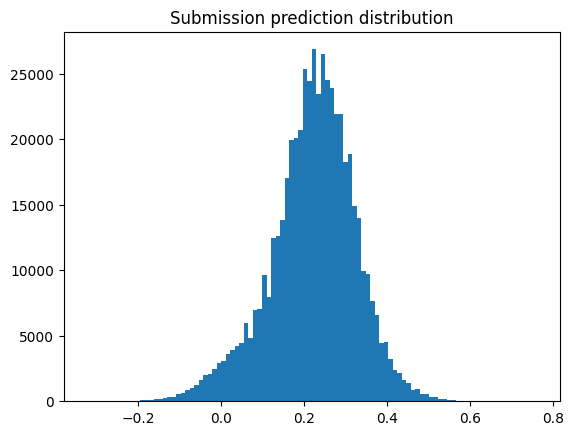

In [25]:
plt.hist(sub["prediction"], bins=100)
plt.title("Submission prediction distribution")
plt.show()

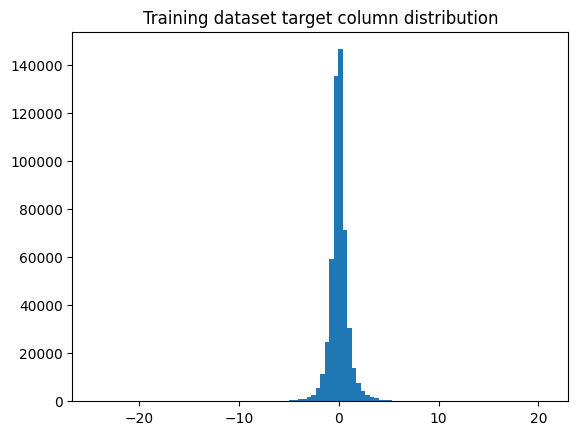

In [26]:
plt.hist(df_train["label"], bins=100)
plt.title("Training dataset target column distribution")
plt.show()